# 基于深度学习的文本分类

FastText

Word2vec

Bert

## 传统文本分类表示方法的缺陷

- 转换得到的向量维度很高，需要较长的训练时间
- 没有考虑单词与单词之间的关系，只是进行了统计

## FastText  

### FastText简介
FastText是一种典型的深度学习词向量的表示方法，它非常简单通过Embedding层将单词映射到稠密空间，然后将句子中所有的单词在Embedding空间中进行平均，进而完成分类操作。

所以FastText是一个三层的神经网络，输入层、隐含层和输出层。

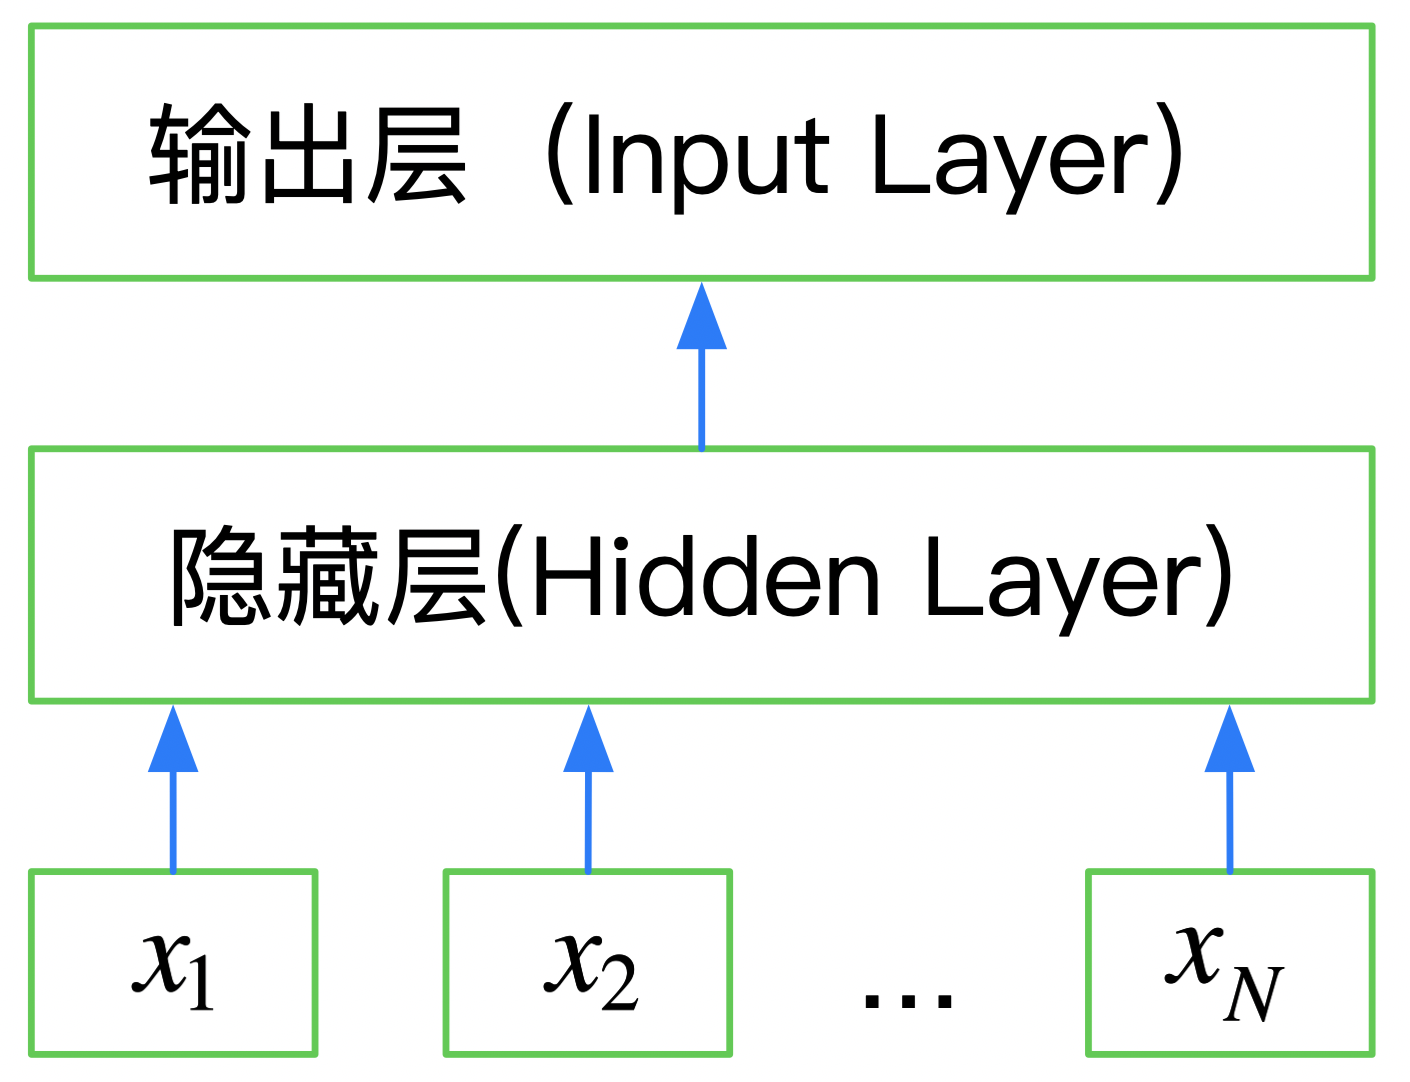

FastText在文本分类任务上，是优于TF-IDF的：

- FastText用单词的Embedding叠加获得的文档向量，将相似的句子分为一类
- FastText学习到的Embedding空间维度比较低，可以快速进行训练

论文：(Bag of Tricks for Efficient Text Classification)[https://arxiv.org/abs/1607.01759]

### 文本分类
FastText可以快速的在CPU上进行训练，最好的实践方法就是官方开源的版本： https://github.com/facebookresearch/fastText/tree/master/python

In [1]:
# pytorch实现fasttext网络结构

In [1]:
# 分类模型
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# %cd /content/drive/My Drive/Colab/文本分类入门

import pandas as pd
from sklearn.metrics import f1_score

# 转换为FastText需要的格式
df_train = pd.read_csv("train_set.csv", sep='\t')
df_test = pd.read_csv("train_set.csv", sep='\t')
df_train['label_ft'] = '__label__' + df_train['label'].astype(str)
df_train[['text', 'label_ft']].to_csv('train.csv',
                                                     index=None,
                                                     header=None,
                                                     sep='\t')

import fasttext

# 参数调优   grid search
model = fasttext.train_supervised('train.csv',
                                  lr=0.5,
                                  wordNgrams=2,
                                  verbose=2,
                                  minCount=1,
                                  epoch=25,
                                  loss="hs")

val_pred = [
    model.predict(x)[0][0].split('__')[-1]
    for x in df_test['text']
]
print(
    f1_score(df_train['label'].astype(str),
             val_pred,
             average='macro')) 
# 0.92

FileNotFoundError: [Errno 2] File train_set.csv does not exist: 'train_set.csv'

### 验证集调参

这里我们使用10折交叉验证，每折使用9/10的数据进行训练，剩余1/10作为验证集检验模型的效果。这里需要注意每折的划分必须保证标签的分布与整个数据集的分布一致。

通过10折划分，我们一共得到了10份分布一致的数据，索引分别为0到9，每次通过将一份数据作为验证集，剩余数据作为训练集，获得了所有数据的10种分割。不失一般性，我们选择最后一份完成剩余的实验，即索引为9的一份做为验证集，索引为1-8的作为训练集，然后基于验证集的结果调整超参数，使得模型性能更优。

##  词向量

word2vec模型背后的基本思想是对出现在上下文环境里的词进行预测。对于每一条输入文本，我们选取一个上下文窗口和一个中心词，并基于这个中心词去预测窗口里其他词出现的概率。因此，word2vec模型可以方便地从新增语料中学习到新增词的向量表达，是一种高效的在线学习算法（online learning）

word2vec的主要思路：通过单词和上下文彼此预测，对应的两个算法分别为：

- Skip-grams (SG)：预测上下文
- Continuous Bag of Words (CBOW)：预测目标单词

另外提出两种更加高效的训练方法：

- Hierarchical softmax

- Negative sampling

## 参考

https://blog.csdn.net/feilong_csdn/article/details/88655927

https://blog.csdn.net/xuxiatian/article/details/89086285